In [16]:
import os
import cv2
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import math


In [23]:
folder_path = 'resource'
file_list = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
dropdown = widgets.Dropdown(
    options=[(f"{i}. {name}", name) for i, name in enumerate(file_list)],
    description='Gambar:'
)
display(dropdown)

Dropdown(description='Gambar:', options=(('0. WhatsApp Image 2025-05-02 at 2.38.25 PM.jpeg', 'WhatsApp Image 2…

In [24]:
def manual_grayscale(img, height, width):
    grayscale = [[0 for _ in range(width)] for _ in range(height)]
    KR, KG, KB = 0.299, 0.587, 0.114
    for y in range(height):
        for x in range(width):
            b = img[y, x, 0] / 255.0
            g = img[y, x, 1] / 255.0
            r = img[y, x, 2] / 255.0
            gray = KR * r + KG * g + KB * b
            grayscale[y][x] = int(gray * 255)  
    return grayscale

In [25]:
def manual_sobel(grayscale, width, height):
    #Kernel 3x3 
    sobel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    sobel_y = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
    
    #inisiasi kanvas x dan y penampungan perhitungan dari perkalian sobel_x & y
    sobel_output = [[0 for _ in range(width)] for _ in range(height)]
    
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            gx = 0
            gy = 0
            # Konvolusi dengan kernel Sobel
            for ky in range(-1, 2):
                for kx in range(-1, 2):
                    pixel = grayscale[y + ky][x + kx]
                    gx += sobel_x[ky + 1][kx + 1] * pixel
                    gy += sobel_y[ky + 1][kx + 1] * pixel
            
            #pitagoras
            magnitude = math.sqrt(gx**2 + gy**2)
            
            # Membatasi nilai ke rentang 0-255
            magnitude = min(max(int(magnitude), 0), 255)
            sobel_output[y][x] = magnitude
    
    return sobel_output

In [26]:
def display_images(original, grayscale, sobel):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title("Gambar Asli")
    plt.imshow(original)
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("Grayscale Manual")
    plt.imshow(grayscale, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Sobel Edge Detection")
    plt.imshow(sobel, cmap='gray')
    plt.axis('off')
    
    plt.show()


Dropdown(description='Gambar:', index=3, options=(('0. WhatsApp Image 2025-05-02 at 2.38.25 PM.jpeg', 'WhatsAp…

Tipe data gambar: uint8, ukuran: (612, 398, 3)

Konversi ke Grayscale dimulai...
Grayscale selesai.

Deteksi tepi Sobel dimulai...
Deteksi tepi Sobel selesai.


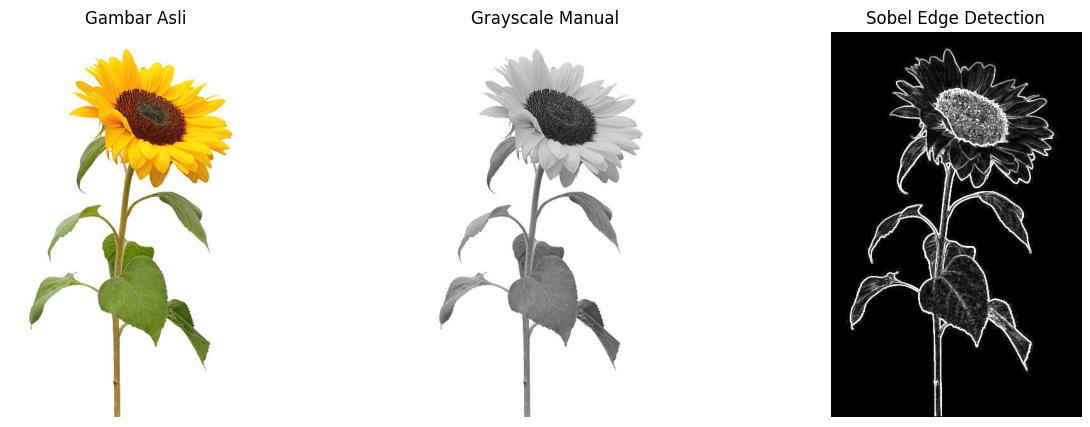

In [27]:
def on_dropdown_change(change):
    clear_output(wait=True)
    display(dropdown)
    
    selected_file = change['new']
    image_path = os.path.join(folder_path, selected_file)
    # Kiww Kiww Opencv
    img = cv2.imread(image_path)
    img_rgb = img[:, :, ::-1] 
    print(f"Tipe data gambar: {img.dtype}, ukuran: {img.shape}")
    height, width, _ = img.shape
    
    #kiww kiwwww Fungsi grayscale
    print("\nKonversi ke Grayscale dimulai...")
    grayscale = manual_grayscale(img, height, width)
    print("Grayscale selesai.")
    
    # Kiww Kiww Fungsi sobel
    print("\nDeteksi tepi Sobel dimulai...")
    sobel_result = manual_sobel(grayscale, width, height)
    print("Deteksi tepi Sobel selesai.")
    
    #PRINTTTTT!!!!
    display_images(img_rgb, grayscale, sobel_result)



dropdown.observe(on_dropdown_change, names='value')
if file_list:
    on_dropdown_change({'new': dropdown.value})